In [1]:
#import foundational libraries
import pandas as pd
from pandas import DataFrame
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import tools
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#display version
from platform import python_version
print("The Python Version is", python_version())

The Python Version is 3.11.4


In [2]:
#import CSV file
df = pd.read_csv("C:/Users/e0145653/Documents/WGU/D212 - Data Mining II/medical_market_basket.csv")

In [3]:
#look at header
print(df.head(5))

      Presc01            Presc02                    Presc03       Presc04  \
0         NaN                NaN                        NaN           NaN   
1  amlodipine  albuterol aerosol                allopurinol  pantoprazole   
2         NaN                NaN                        NaN           NaN   
3  citalopram            benicar  amphetamine salt combo xr           NaN   
4         NaN                NaN                        NaN           NaN   

     Presc05     Presc06     Presc07      Presc08     Presc09      Presc10  \
0        NaN         NaN         NaN          NaN         NaN          NaN   
1  lorazepam  omeprazole  mometasone  fluconozole  gabapentin  pravastatin   
2        NaN         NaN         NaN          NaN         NaN          NaN   
3        NaN         NaN         NaN          NaN         NaN          NaN   
4        NaN         NaN         NaN          NaN         NaN          NaN   

  Presc11   Presc12                  Presc13           Presc14  Pres

In [4]:
#What is the shape?

df.shape

(15002, 20)

In [5]:
#remove NaN rows from the dataset

mbdf = df[df['Presc01'].notna()]
mbdf.shape

(7501, 20)

In [6]:
#Transform Original Dataset suitable for Apriori Algorithm

rows = []

for i in range(0,7501):
    rows.append([str(mbdf.values[i,j])
for j in range(0,20)])

In [7]:
rows[0]

['amlodipine',
 'albuterol aerosol',
 'allopurinol',
 'pantoprazole',
 'lorazepam',
 'omeprazole',
 'mometasone',
 'fluconozole',
 'gabapentin',
 'pravastatin',
 'cialis',
 'losartan',
 'metoprolol succinate XL',
 'sulfamethoxazole',
 'abilify',
 'spironolactone',
 'albuterol HFA',
 'levofloxacin',
 'promethazine',
 'glipizide']

In [8]:
#List fed to TransactionEncoder

TE = TransactionEncoder()
array = TE.fit(rows).transform(rows)

#Return list to DataFrame

transaction = pd.DataFrame(array, columns = TE.columns_)

In [9]:
transaction.head(1)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [10]:
transaction.shape

(7501, 120)

In [11]:
for col in transaction.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [12]:
#remove NaN columns
cleaned_df = transaction.drop(['nan'], axis=1)

#export CSV
cleaned_df.to_csv(
    "C:/Users/e0145653/Documents/WGU/D212 - Data Mining II/PRFA - OFM4/OFMA - 3 - Association Rules and Lift Analysis/medical_cleaned_t3.csv",
    header = True, index = False)

In [13]:
#import cleaned df
data = pd.read_csv(
    "C:/Users/e0145653/Documents/WGU/D212 - Data Mining II/PRFA - OFM4/OFMA - 3 - Association Rules and Lift Analysis/medical_cleaned_t3.csv",
    header = 0)

In [14]:
print(data.shape)
print(data.columns)

(7501, 119)
Index(['Duloxetine', 'Premarin', 'Yaz', 'abilify', 'acetaminophen', 'actonel',
       'albuterol HFA', 'albuterol aerosol', 'alendronate', 'allopurinol',
       ...
       'trazodone HCI', 'triamcinolone Ace topical', 'triamterene',
       'trimethoprim DS', 'valaciclovir', 'valsartan', 'venlafaxine XR',
       'verapamil SR', 'viagra', 'zolpidem'],
      dtype='object', length=119)


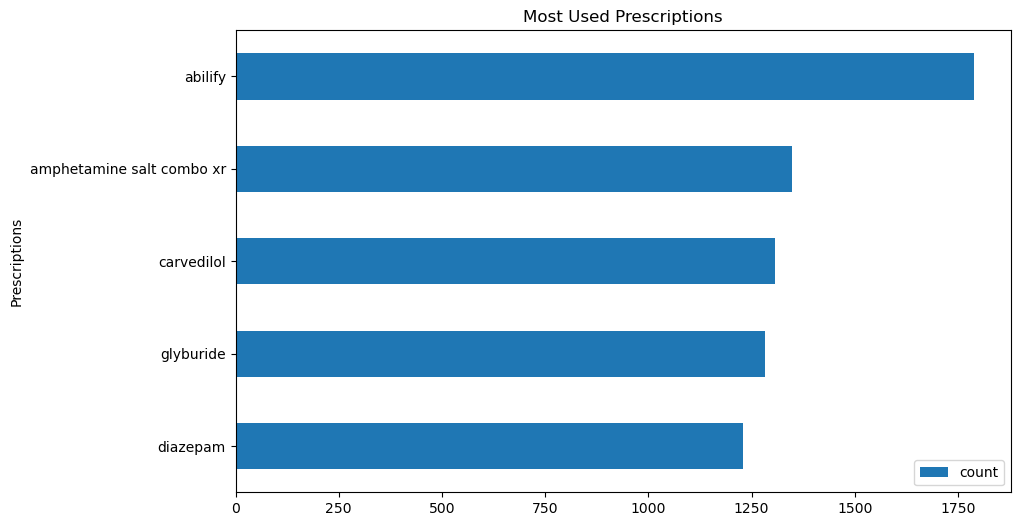

In [15]:
#Find the 5 most popular prescriptions

count = data.loc[:,:].sum()

pop_item = count.sort_values(0, ascending = False).head(5)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'Prescriptions',0: 'count'})

#Visualize the 5 most popular prescriptions

plt.rcParams['figure.figsize'] = (10,6)
ax = pop_item.plot.barh(x = 'Prescriptions', y = 'count')
plt.title('Most Used Prescriptions')
plt.gca().invert_yaxis()


In [16]:
#Create Apriori object
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(data,
                            min_support = 0.01,
                            max_len = None,
                            use_colnames = True)

frequent_itemsets.sort_values(by = 'support', ascending = False).head(5)

,support,itemsets
2,0.238368,(abilify)
11,0.179709,(amphetamine salt combo xr)
17,0.174110,(carvedilol)
39,0.170911,(glyburide)
27,0.163845,(diazepam)


In [17]:
#Create the Rules Table

rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.01)

rules.sort_values(by = 'support', ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
14,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
26,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
27,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
10,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648


In [18]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

print(rules[['antecedents', 'consequents']])

                 antecedents              consequents
0                   diazepam                 Premarin
1                   Premarin                 diazepam
2                    abilify              allopurinol
3                allopurinol                  abilify
4                 alprazolam                  abilify
..                       ...                      ...
427    diazepam,atorvastatin               carvedilol
428  carvedilol,atorvastatin                 diazepam
429                 diazepam  carvedilol,atorvastatin
430               carvedilol    diazepam,atorvastatin
431             atorvastatin      diazepam,carvedilol

[432 rows x 2 columns]


In [19]:
#create pivot table of antecedents and consequents for support metric
support_table = rules.pivot(index = 'consequents',
                           columns = 'antecedents',
                           values = 'support')

In [20]:
support_table.head()

antecedents,Premarin,abilify,allopurinol,alprazolam,amlodipine,amphetamine salt combo,amphetamine salt combo xr,"amphetamine salt combo xr,abilify",atorvastatin,"atorvastatin,abilify",...,methylprednisone,metoprolol,metoprolol succinate XL,"metoprolol,abilify","metoprolol,atorvastatin","metoprolol,carvedilol",naproxen,paroxetine,spironolactone,tamsulosin
consequents,,,,,,,,,,,,,,,,,,,,,
Premarin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abilify,NaN,NaN,0.011598,0.017064,0.023597,0.024397,0.050927,NaN,0.047994,NaN,...,0.017064,0.035729,0.015065,NaN,0.011065,0.011998,0.020131,0.019197,0.017064,0.010932
allopurinol,NaN,0.011598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alprazolam,NaN,0.017064,NaN,NaN,NaN,NaN,0.011065,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amlodipine,NaN,0.023597,NaN,NaN,NaN,0.011199,0.014131,NaN,0.017598,NaN,...,NaN,0.016664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='antecedents', ylabel='consequents'>

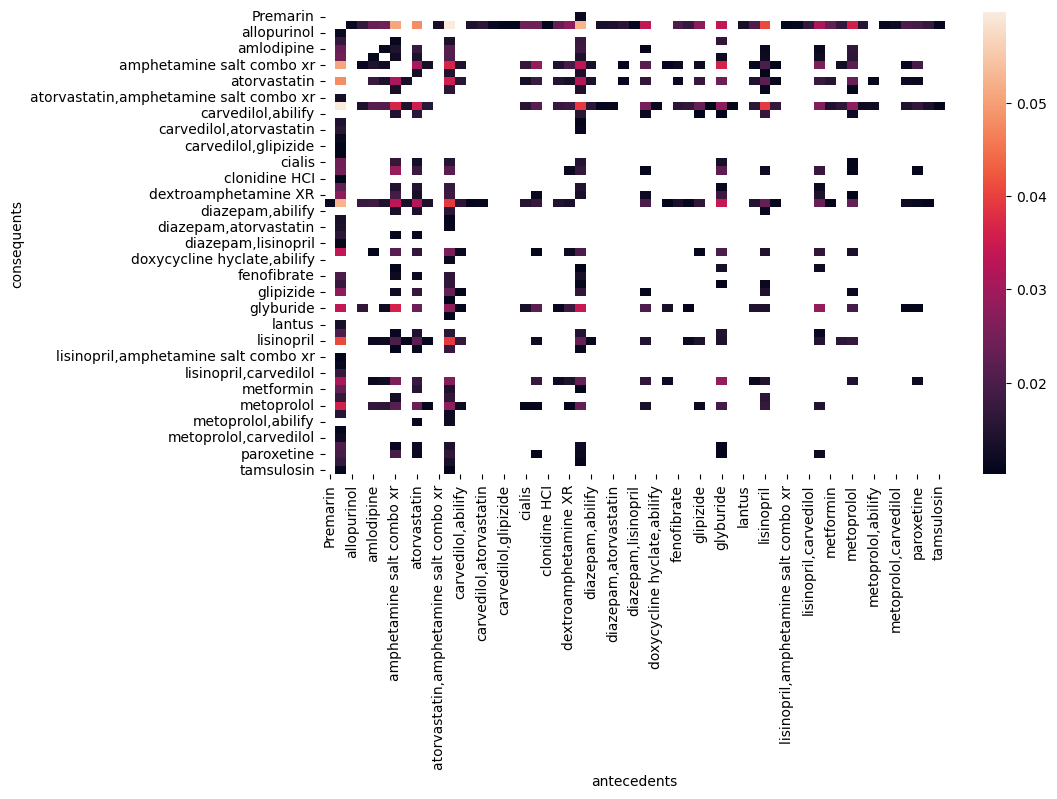

In [21]:
#visualize pivot table
sns.heatmap(support_table,
           #annot = True,
           #cbar = False,
           cmap = 'rocket')

In [22]:
#Determine the top 3 rules by the Support Metric
top_three_rules = rules.sort_values('support', ascending = False).head(3)

top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,abilify,carvedilol,0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
14,carvedilol,abilify,0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
26,diazepam,abilify,0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


In [23]:
basket = (rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

basket.sort_values(['support', 'confidence', 'lift'], ascending = False).head(5)

,antecedents,consequents,support,confidence,lift
14,carvedilol,abilify,0.059725,0.343032,1.439085
15,abilify,carvedilol,0.059725,0.250559,1.439085
26,diazepam,abilify,0.052660,0.321400,1.348332
27,abilify,diazepam,0.052660,0.220917,1.348332
10,amphetamine salt combo xr,abilify,0.050927,0.283383,1.188845


In [24]:
#export CSV
basket.to_csv(
    "C:/Users/e0145653/Documents/WGU/D212 - Data Mining II/PRFA - OFM4/OFMA - 3 - Association Rules and Lift Analysis/basket_t3.csv",
    header = True, index = False)

In [25]:
rules.shape

(432, 10)